In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#just for the notebook
%run implementations
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
DATA_TEST_PATH = '../data/test.csv'
y, tX, train_ids, feature_names = load_csv_data(DATA_TRAIN_PATH)
subsmission_y, submission_x, test_ids, _ = load_csv_data(DATA_TEST_PATH)

In [3]:
tX.shape

(250000, 30)

In [4]:
DEGREE = 3

In [5]:
x_train, y_train, x_test, y_test = split_data(tX, y, 0.8, seed=1)
x_train_copy = np.copy(x_train)

In [6]:
# Append y values as column to later divide y into buckets corresponding with x values
x_train = np.column_stack((x_train, y_train))
x_test = np.column_stack((x_test, y_test))

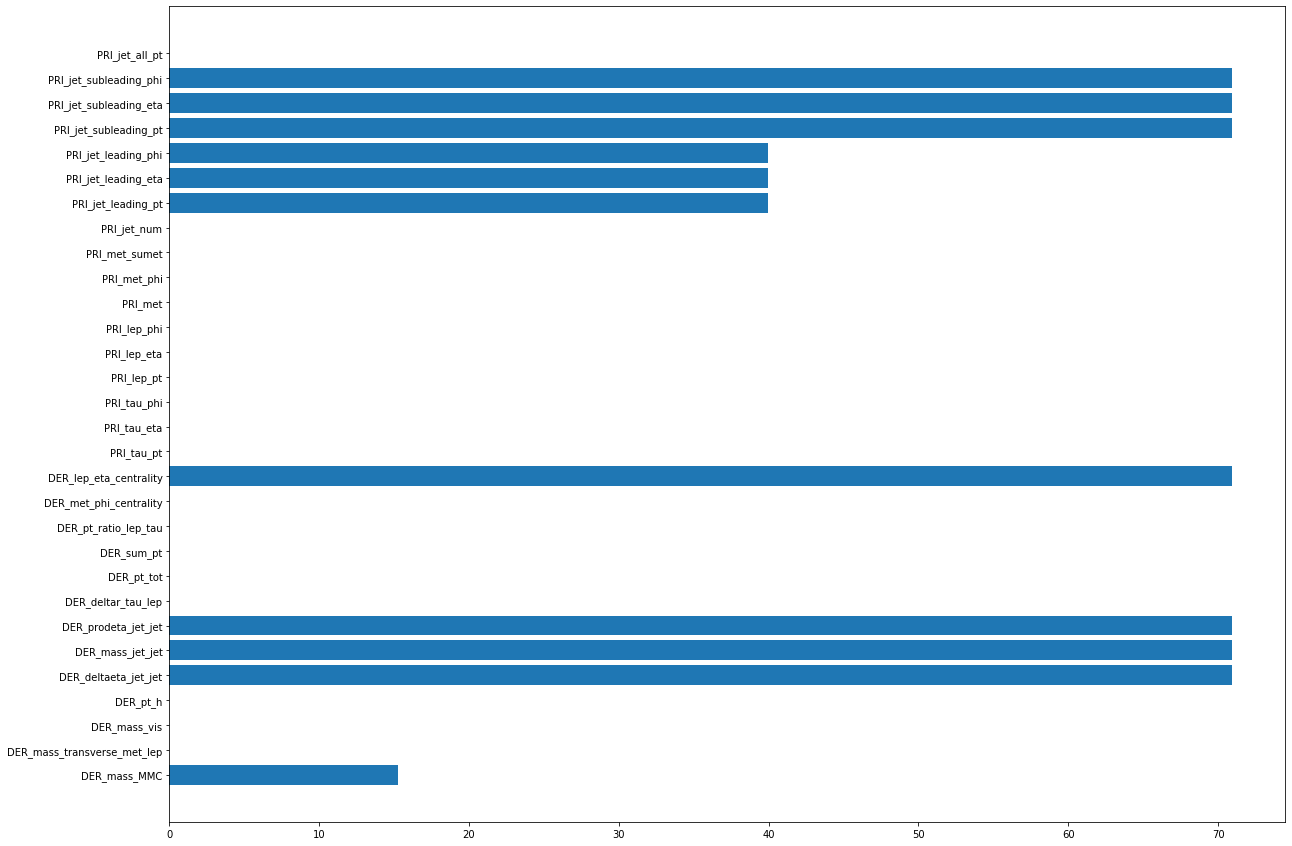

In [7]:
# NAN PERCENTAGE
x_train_with_nan = replace_999_with_nan(x_train_copy)

plotNaNpercentage(x_train_with_nan, feature_names)

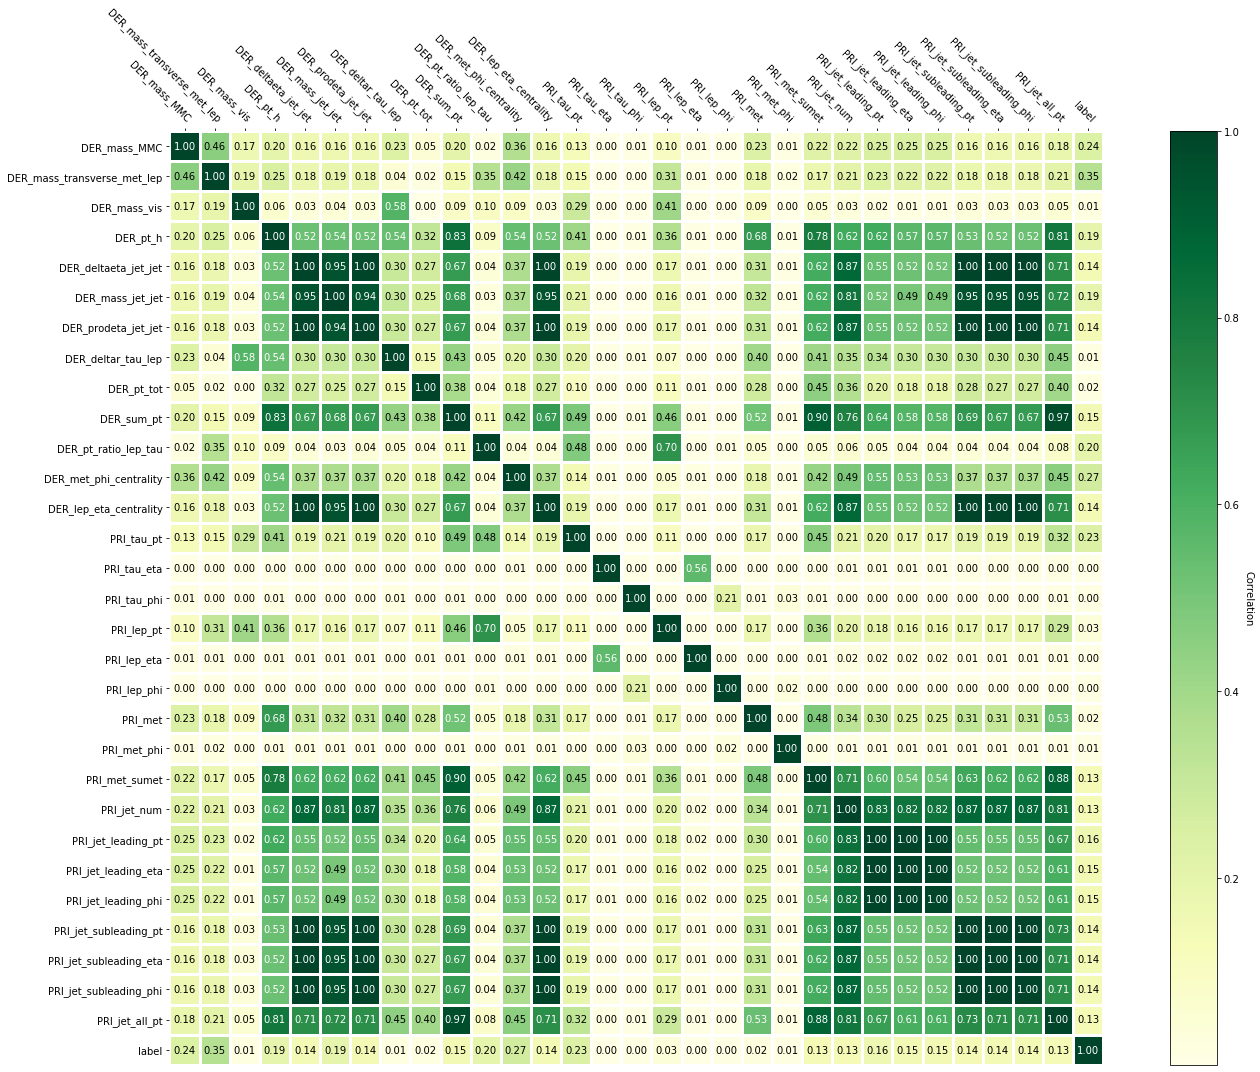

In [8]:
# CORRELATION MATRIX

HEATMAP_SIZE = (20, 15)
cor_mat_full = np.abs(np.corrcoef(x_train.T))
feature_names_label = np.append(feature_names, 'label')

plotHeatMap(cor_mat_full, feature_names_label, feature_names_label, 'correlation-initial.png', HEATMAP_SIZE)

In [9]:
new_matrix, new_features= popCorrelatedFeatures(x_train_copy, 0.86)

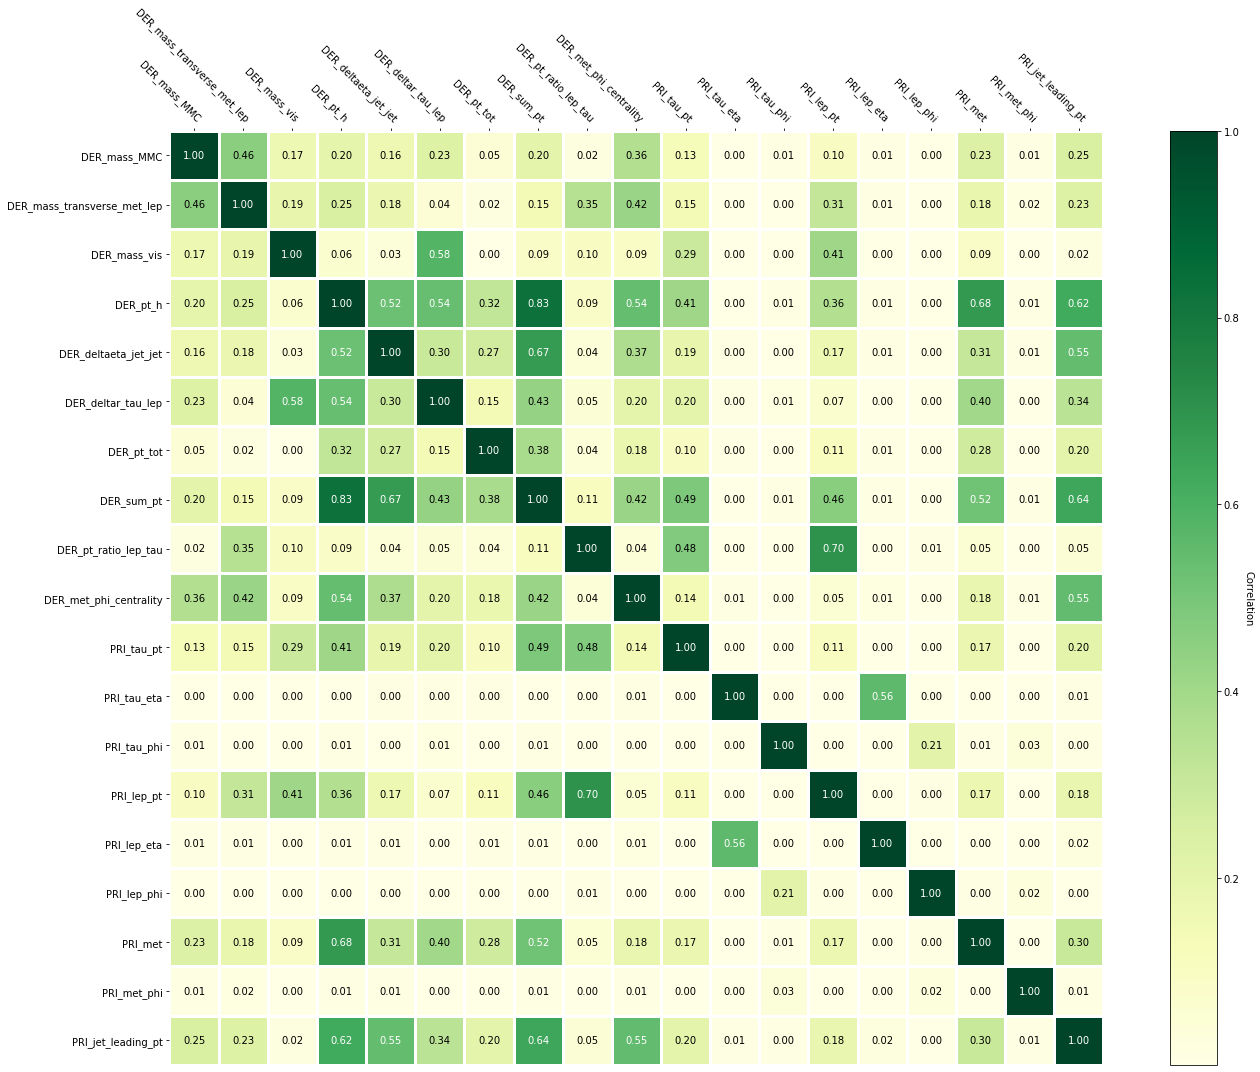

In [10]:
# CORRELATION MATRIX

cor_new_mat = np.abs(np.corrcoef(new_matrix.T))
new_feature_names = []
for i in range(len(feature_names)):
    if(i in new_features):
        new_feature_names.append(feature_names[i])

plotHeatMap(cor_new_mat, new_feature_names, new_feature_names, 'correlation-new.png', HEATMAP_SIZE)

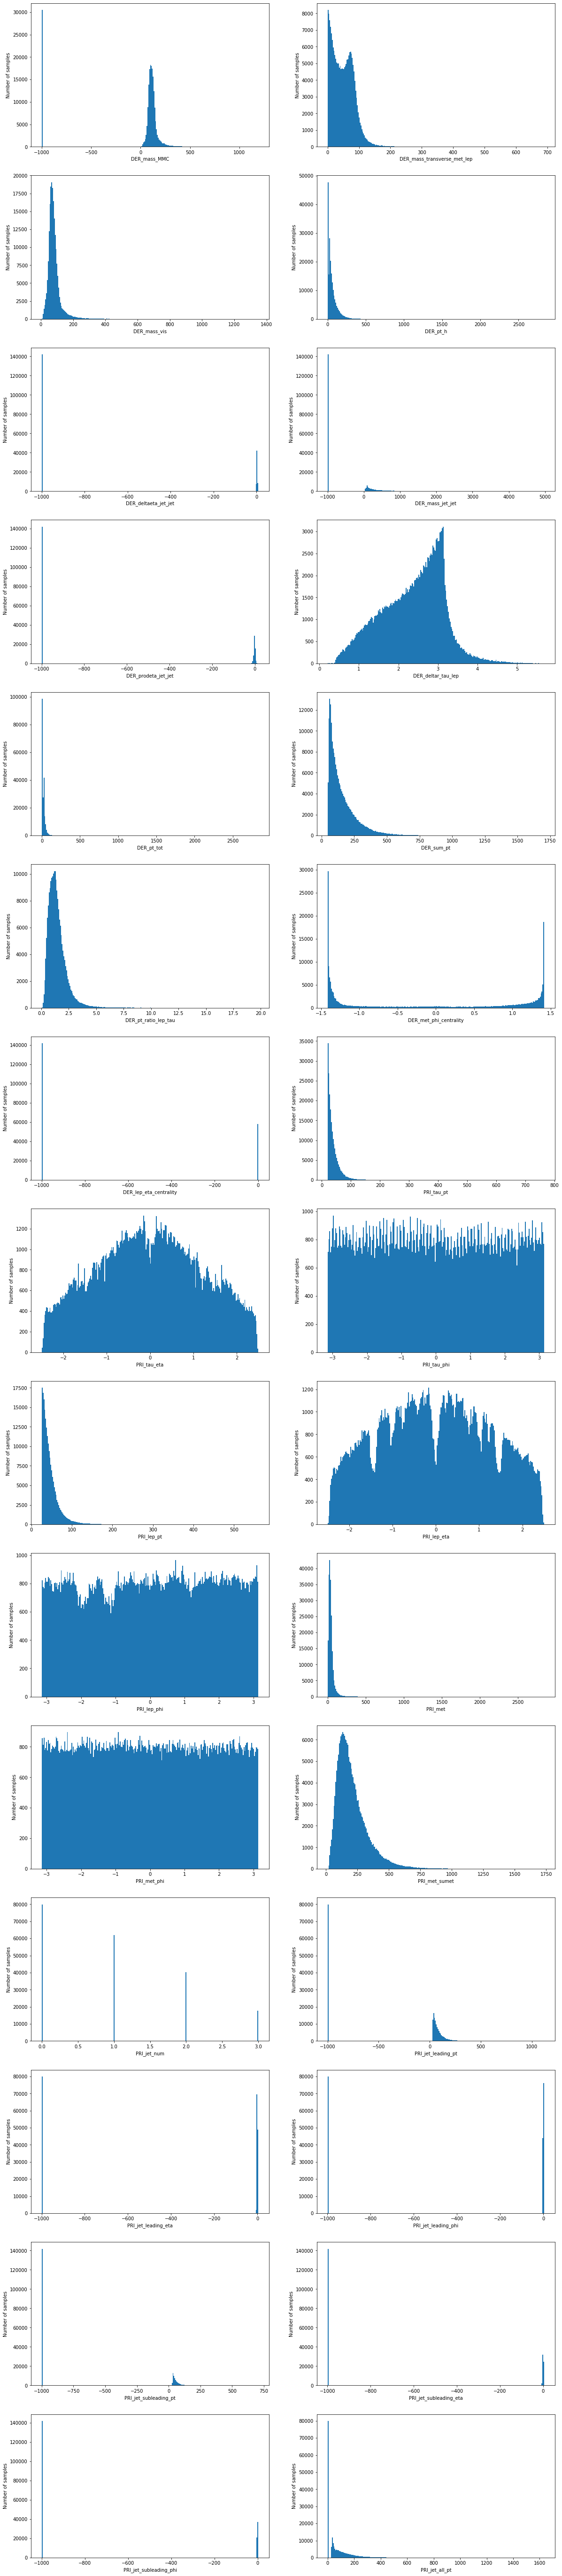

In [11]:
plotDistributions(x_train_copy, feature_names)

In [12]:
# get all the needed buckets
buckets = get_buckets(x_train)
# y
y_buckets = []
for i in range(len(buckets)):
    y_buckets.append(buckets[i][:, -1])
    buckets[i] = np.delete(buckets[i], -1, 1)
# test
test_buckets = get_buckets(x_test)
submission_x_buckets = get_buckets(submission_x.copy())
# test y
test_y_buckets = []
for i in range(len(test_buckets)):
    test_y_buckets.append(test_buckets[i][:, -1])
    test_buckets[i] = np.delete(test_buckets[i], -1, 1)

(59052, 30)


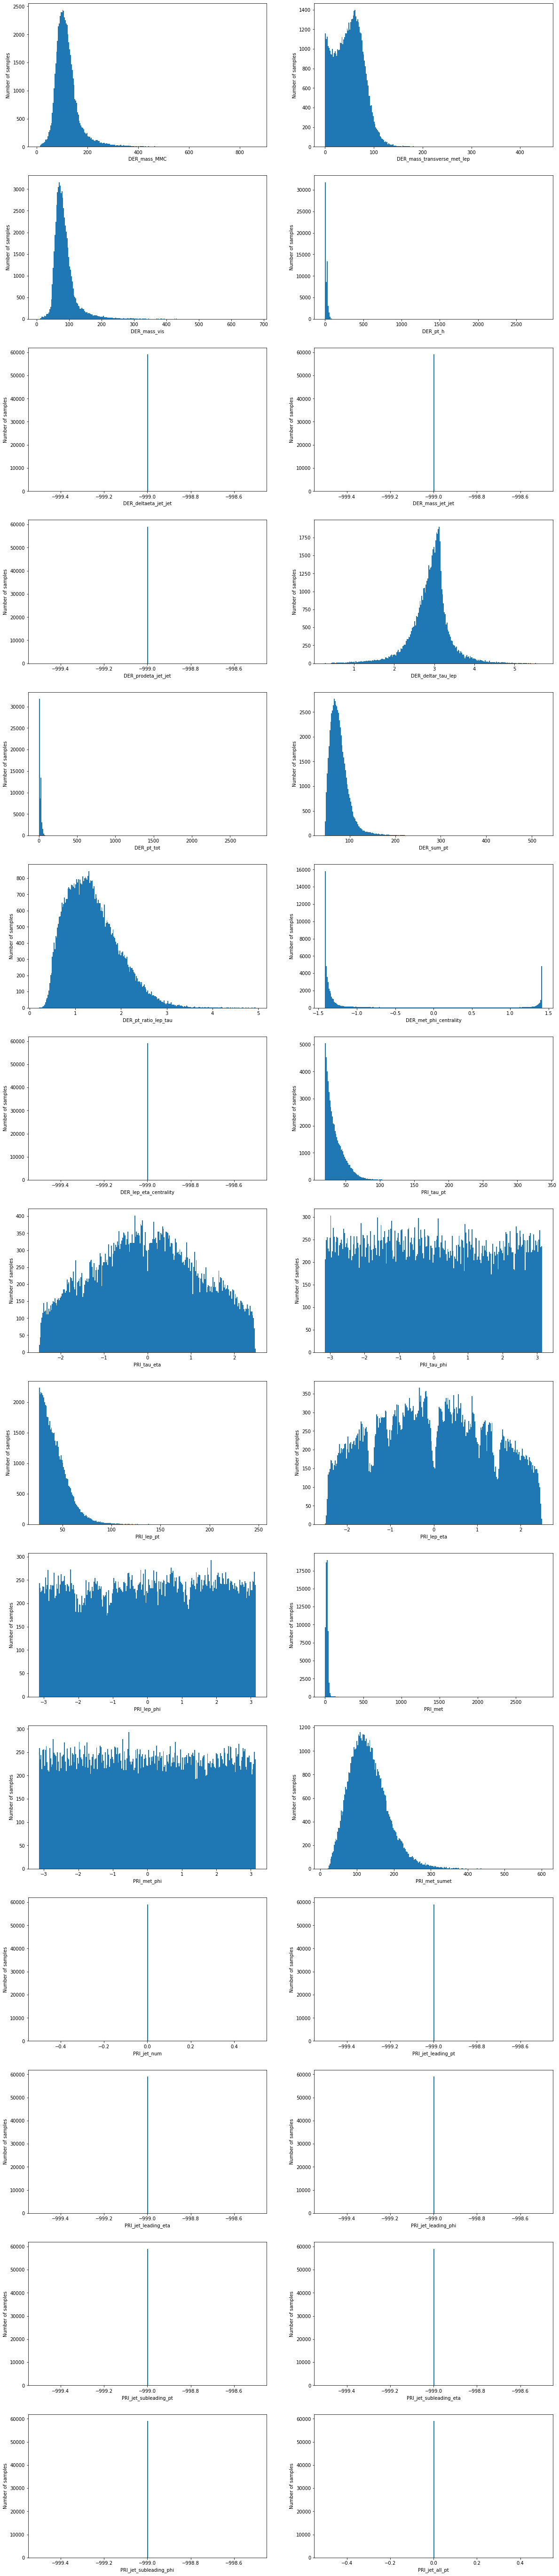

In [13]:
# Bucket 0
plotDistributions(buckets[0], feature_names)

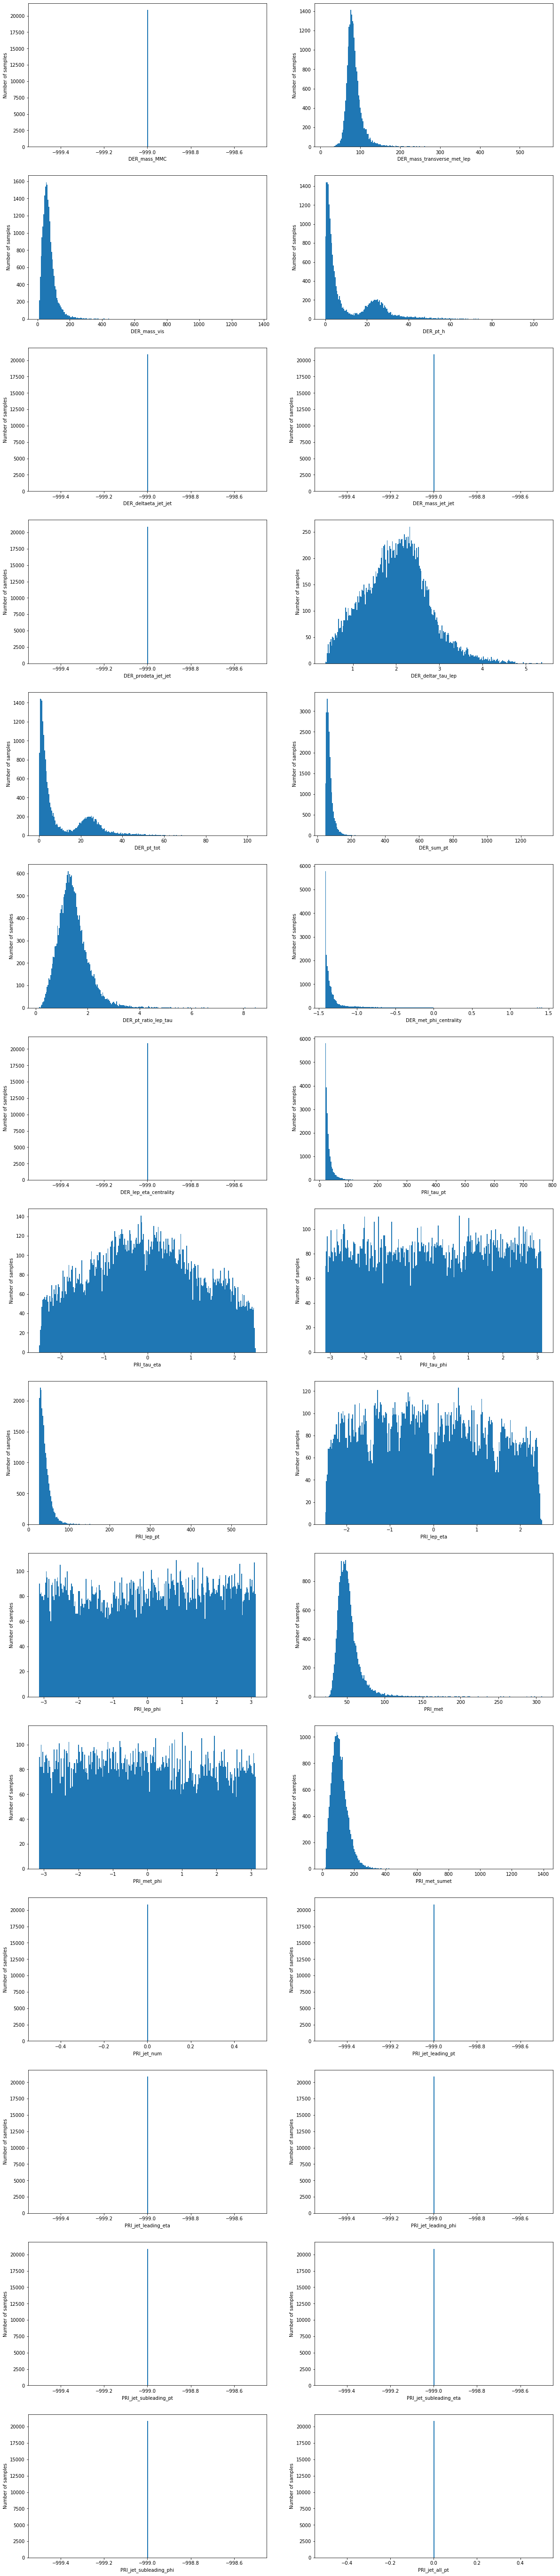

In [14]:
# Bucket 1
plotDistributions(buckets[1], feature_names)

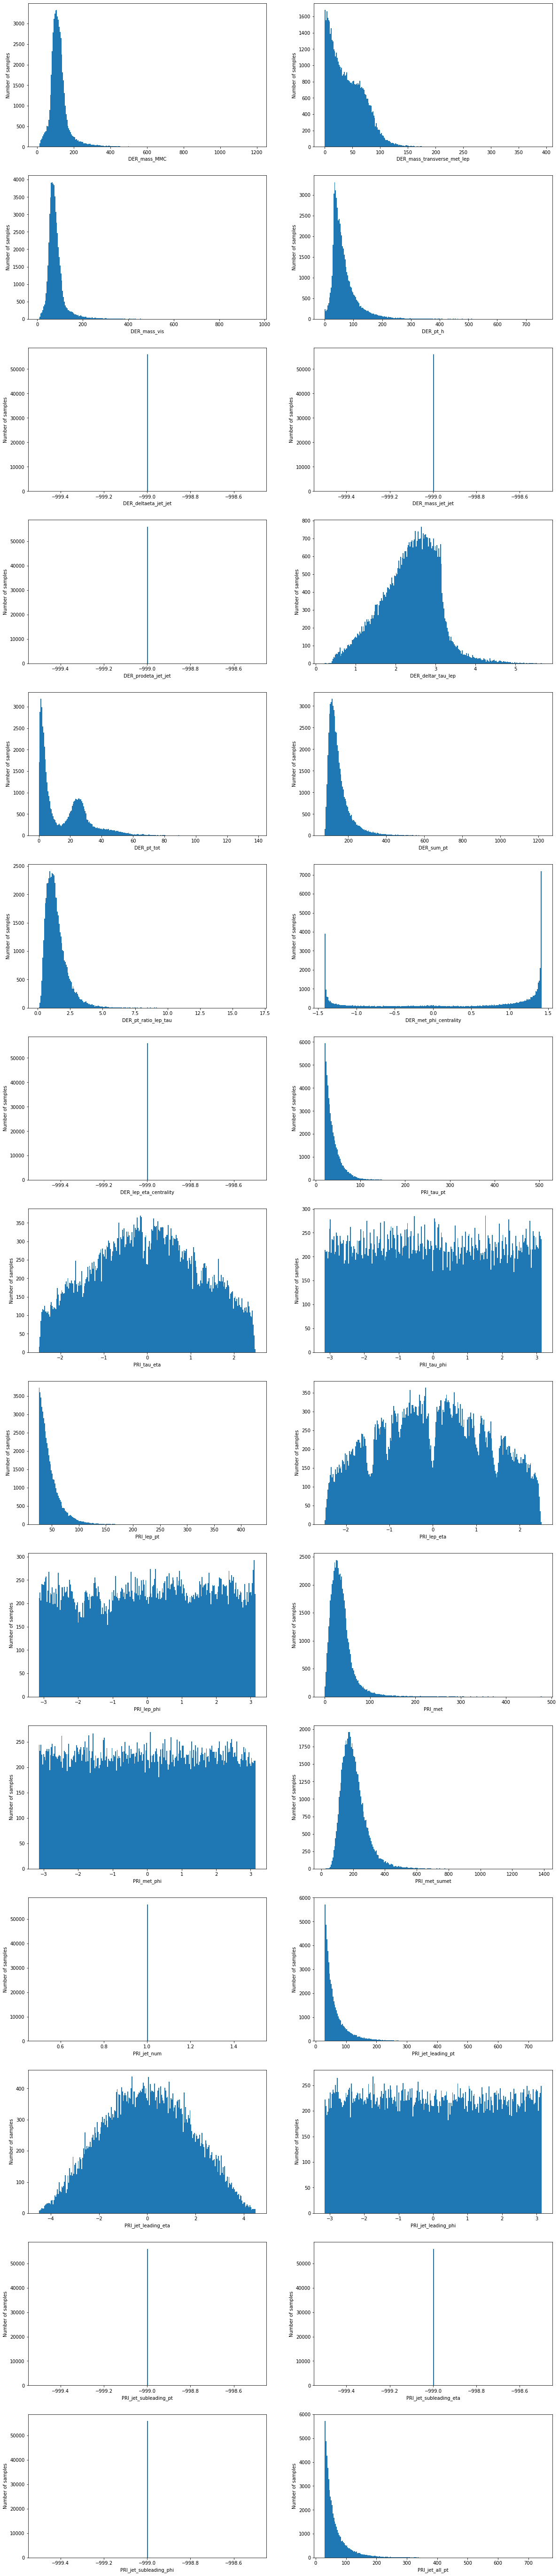

In [15]:
# Bucket 2
plotDistributions(buckets[2], feature_names)

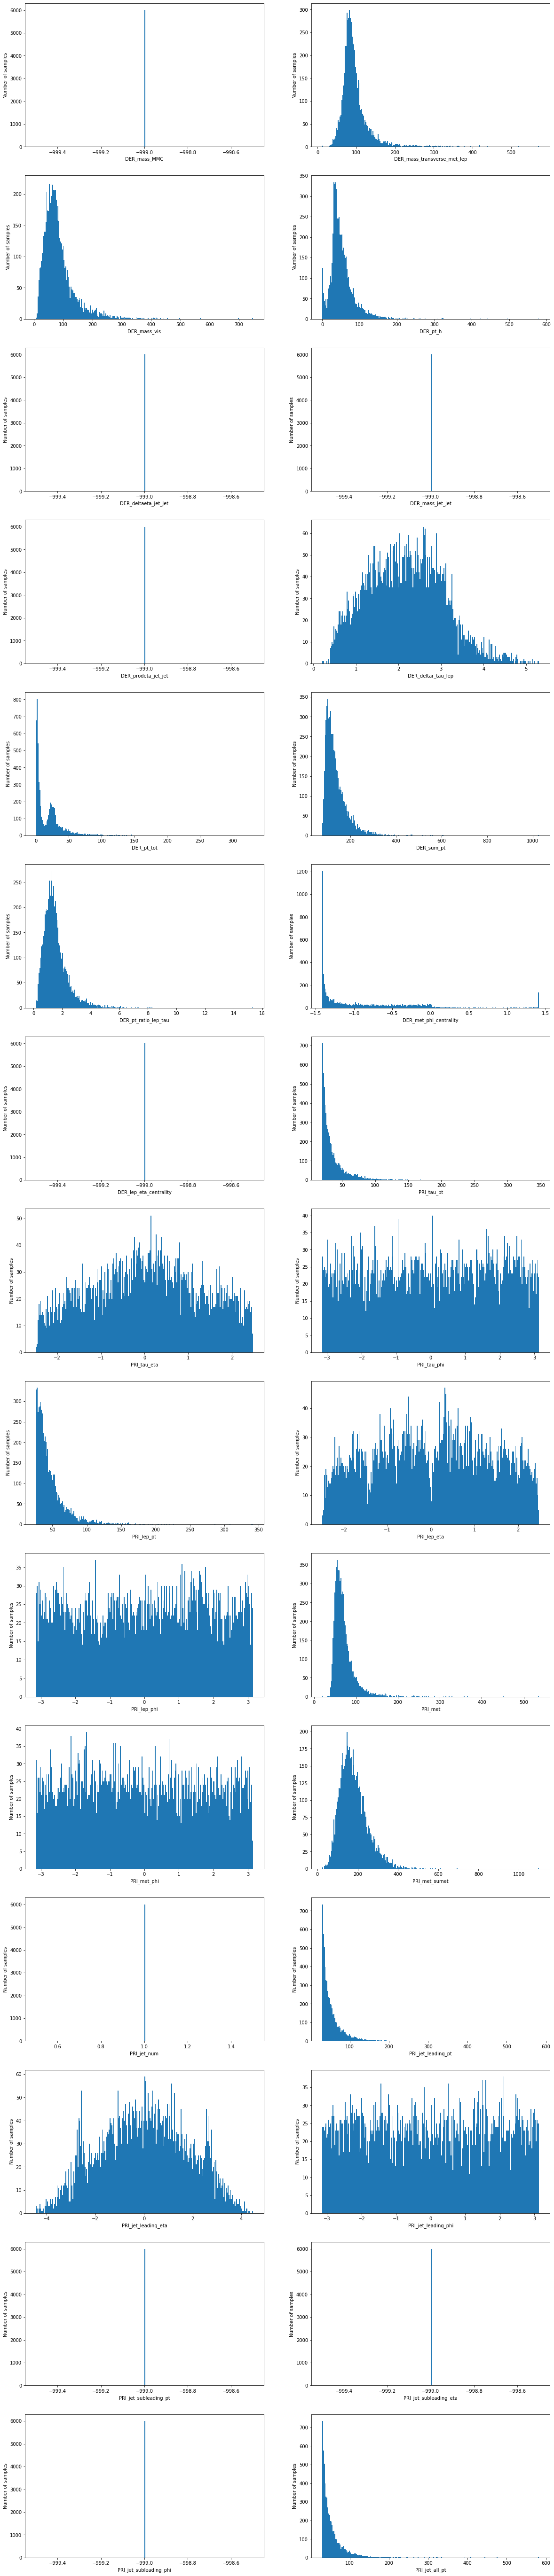

In [16]:
# Bucket 3
plotDistributions(buckets[3], feature_names)

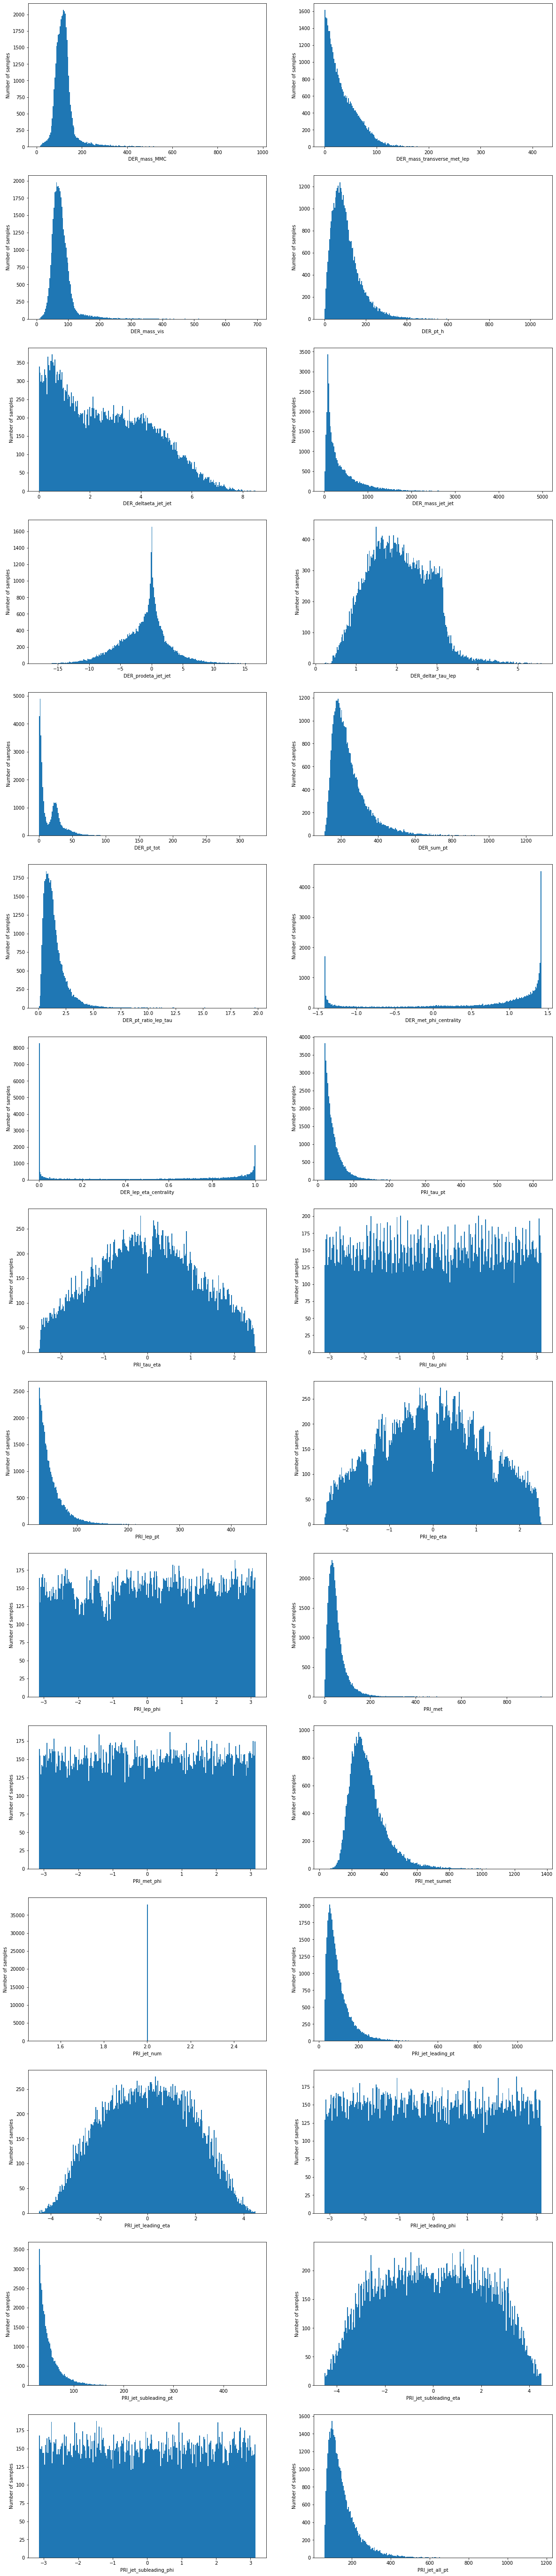

In [17]:
# Bucket 4
plotDistributions(buckets[4], feature_names)

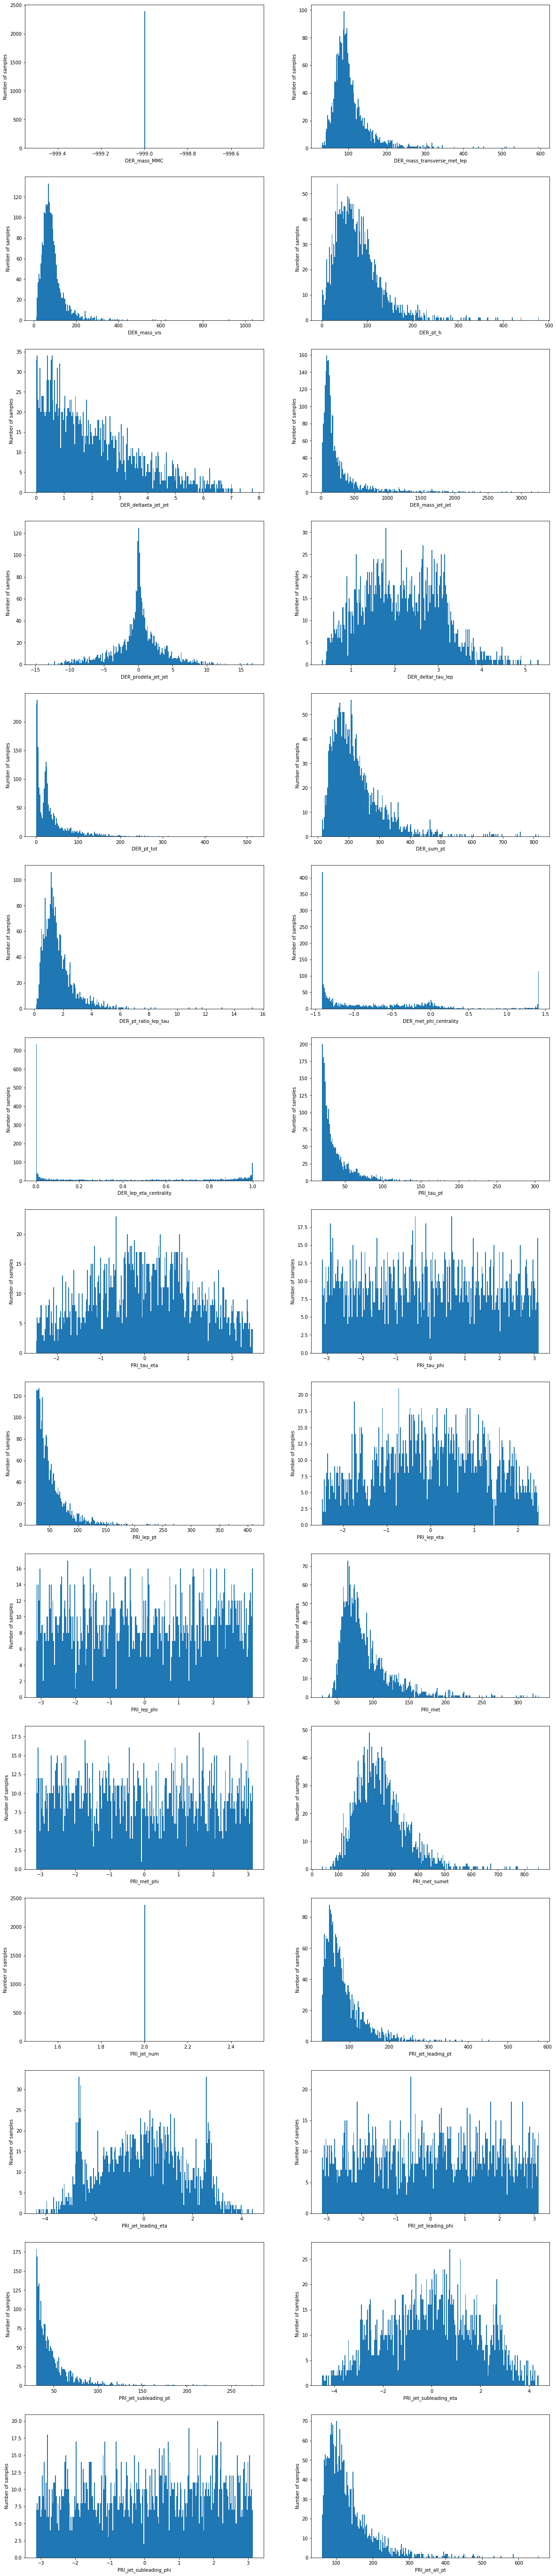

In [18]:
# Bucket 5
plotDistributions(buckets[5], feature_names)

In [ ]:
# Bucket 6
plotDistributions(buckets[6], feature_names)

In [ ]:
# Bucket 7
plotDistributions(buckets[7], feature_names)

In [ ]:
# Normalize the matrices
for i in range(len(buckets)):
    buckets[i] = normalize(buckets[i])
    test_buckets[i] = normalize(test_buckets[i])
    submission_x_buckets[i] = normalize(submission_x_buckets[i])

In [ ]:
# Add Intercept
for i in range(len(buckets)):
    buckets[i] = np.column_stack((np.ones((buckets[i].shape[0], 1)), buckets[i]))
    test_buckets[i] = np.column_stack((np.ones((test_buckets[i].shape[0], 1)), test_buckets[i]))
    submission_x_buckets[i] = np.column_stack((np.ones((submission_x_buckets[i].shape[0], 1)),
                                              submission_x_buckets[i]))

In [ ]:
def accuracy(train_buckets, test_buckets, test_y_buckets, weights, degree_and_lambda):
    correct_predictions = 0
    len_data = 0
    for i in range(len(train_buckets)):
        degree = degree_and_lambda[i]["degree"]
        rr_accuracy = compute_accuracy(weights[i], build_poly(test_buckets[i], degree), test_y_buckets[i])
        correct_predictions += (rr_accuracy * len(build_poly(test_buckets[i], degree)))
        len_data += len(build_poly(test_buckets[i], degree))
    total_accuracy = correct_predictions / len_data
    print(f"Accuracy = {total_accuracy}")
    return total_accuracy

In [ ]:
len(test_buckets[0])


In [ ]:
init_w = np.zeros( buckets[0].shape[1]).T
w, l = reg_logistic_regression(y=y_buckets[0], tx= buckets[0], lambda_=62, initial_w=init_w, max_iters=500, gamma=0.0005)
print(w)
print(l)

In [ ]:
best_degree_lambda = []
for i in range(len(buckets)):
    best_degree_lambda.append(best_degree_selection(y=y_buckets[i], x=buckets[i], degrees=range(4), 
                      k_fold=5, lambdas=np.array([50, 100, 150])))

In [ ]:
weights = []
for i in range(len(buckets)):
    degree = best_degree_lambda[i]["degree"]
    print(degree)
    lambda_ = best_degree_lambda[i]["lambda"]
    print(lambda_)
    w_rr, loss_rr = ridge_regression(y=y_buckets[i], tx=build_poly(buckets[i], degree), lambda_=lambda_)
    print(w_rr.shape)
    weights.append(w_rr)

In [ ]:
build_poly(test_buckets[0], 3).shape

In [ ]:
acc = accuracy(train_buckets=buckets, test_buckets=test_buckets, test_y_buckets=test_y_buckets,
                            weights=weights, degree_and_lambda=best_degree_lambda)

In [ ]:
submission_y, submission_x, ids_test, _ = load_csv_data(DATA_TEST_PATH, sub_sample=False)

In [ ]:
ids_array = ids_test
pri_jet_num_feature = submission_x[:, 22]
der_mass_mmc_col_feature = submission_x[:, 0]
ids_array = np.column_stack((ids_array, pri_jet_num_feature))
ids_array = np.column_stack((ids_array, der_mass_mmc_col_feature))

In [ ]:
id_buckets = get_id_buckets(ids_array)

In [ ]:
submission = predict_labels(weights[0], build_poly(submission_x_buckets[0], best_degree_lambda[0]["degree"]))
submission = np.column_stack((submission, id_buckets[0]))
for i in range(1, len(weights)):
    degree = best_degree_lambda[i]["degree"]
    predictions = predict_labels(weights[i], build_poly(submission_x_buckets[i], degree))
    predictions = np.column_stack((predictions, id_buckets[i]))
    submission = np.concatenate((submission, predictions))

In [ ]:
submission = submission[submission[:, 1].argsort()]
submission = submission[:, 0]

In [ ]:
create_csv_submission(ids_test, submission, "../data/output.csv")

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test, _ = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '../data/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)